In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

49


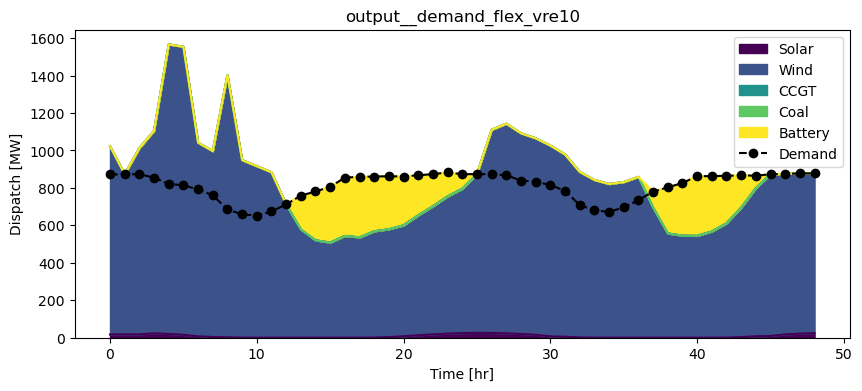

49


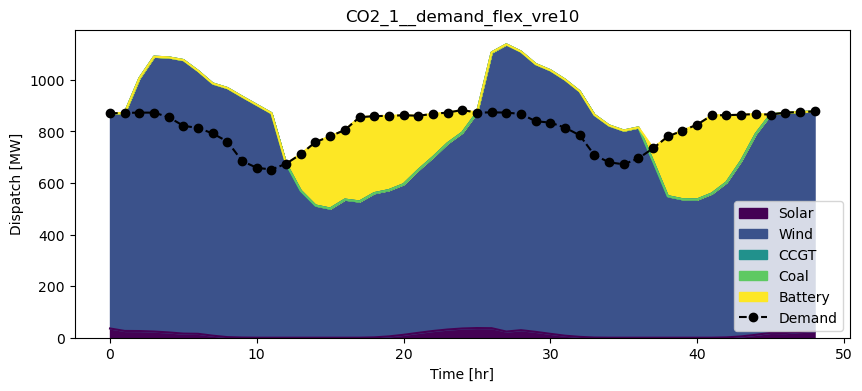

49


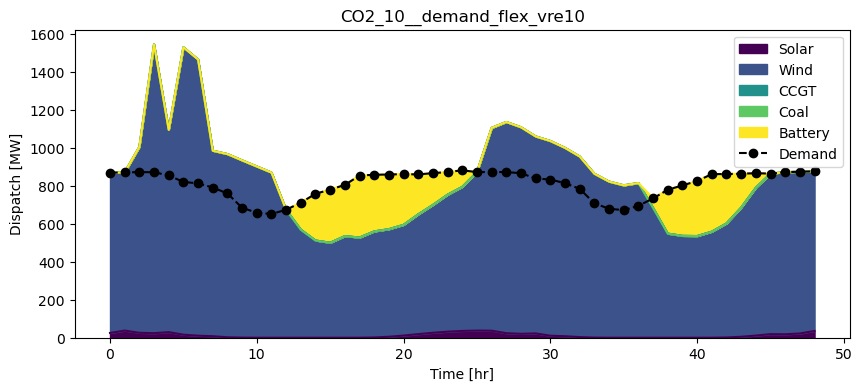

49


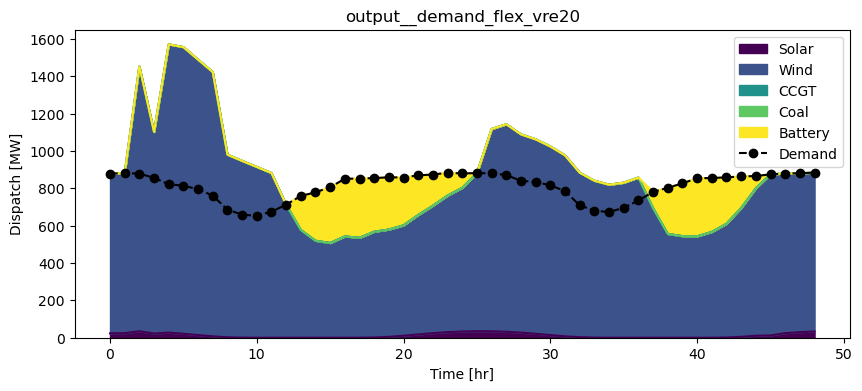

49


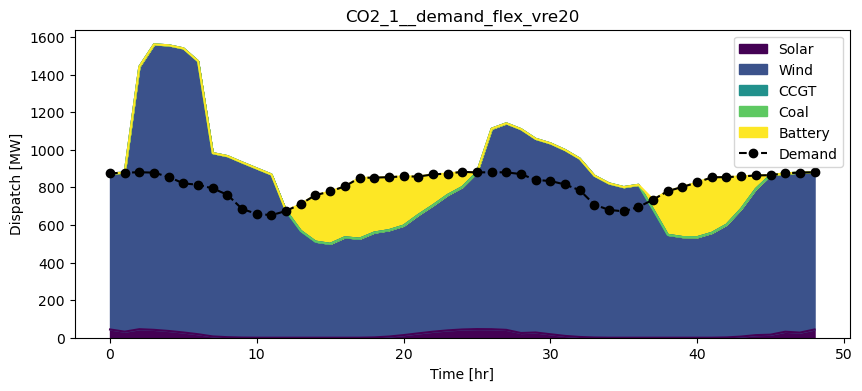

49


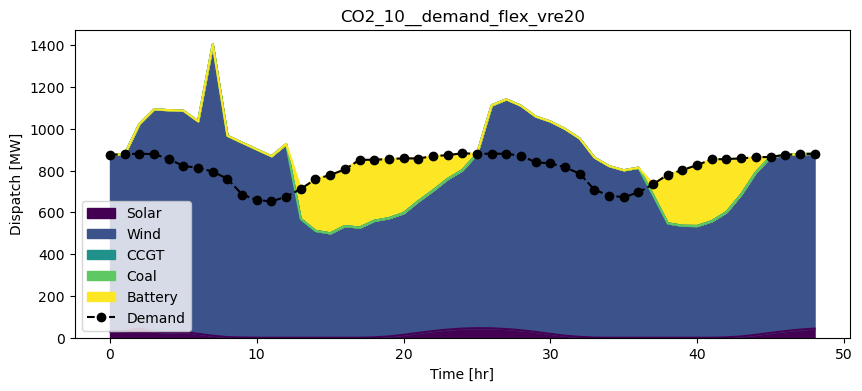

49


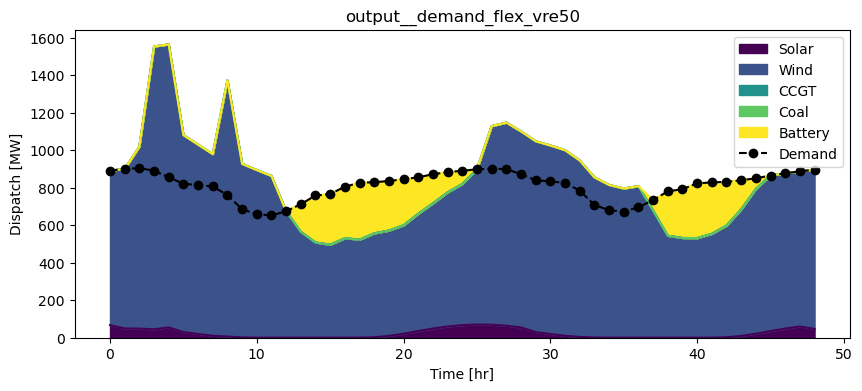

49


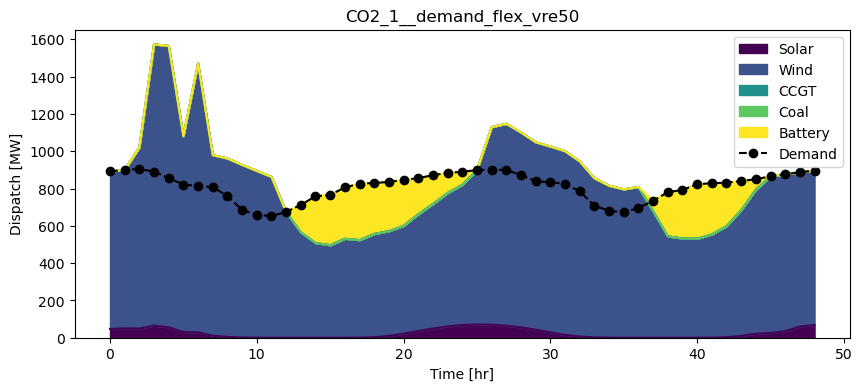

49


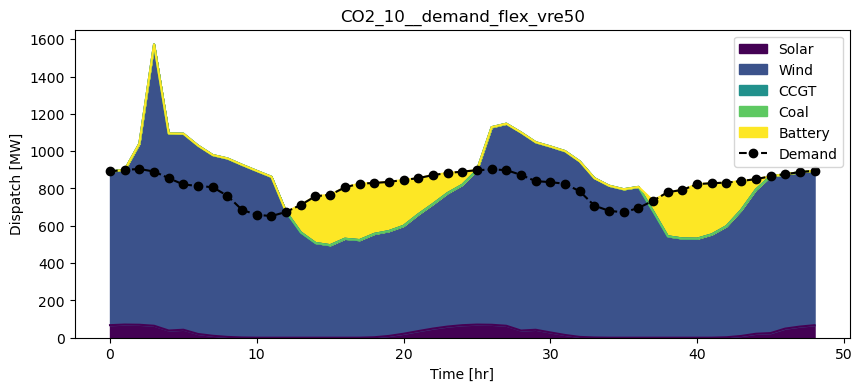

49


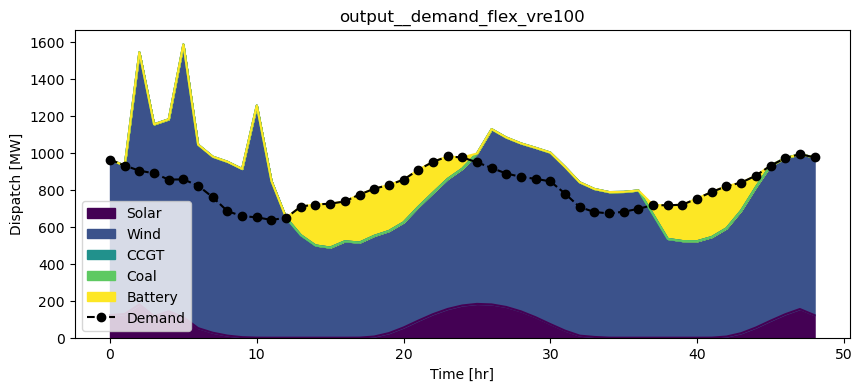

49


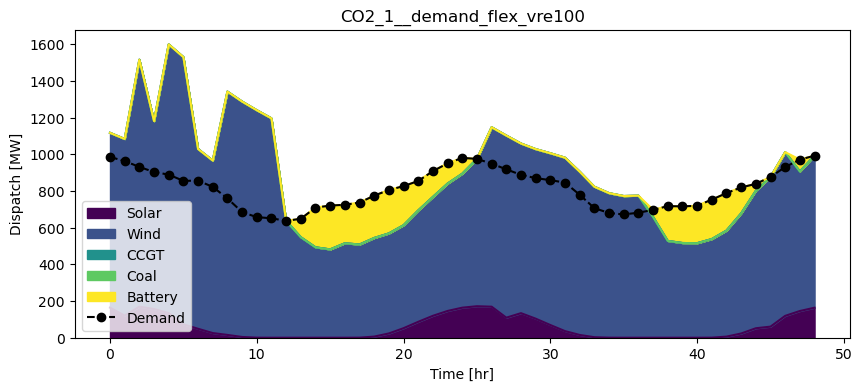

49


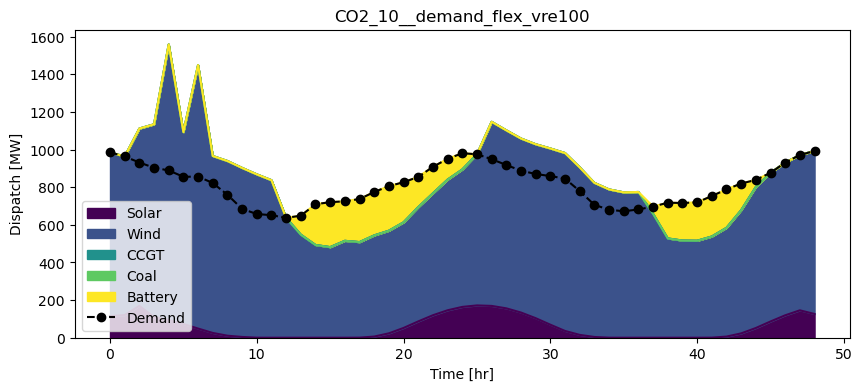

In [18]:
name_demand_flex_input = ["demand_flex_vre10", "demand_flex_vre20", "demand_flex_vre50", "demand_flex_vre100"]
carbon_price = ["output_", "CO2_1_", "CO2_10_"]
main_folder = '/Users/adrienguenard/Desktop/MIT/2.AeroAstro/IDS.522/Project/1.WIP/DSF/DSF_optimization/Results'


for flex_scenario in name_demand_flex_input:
    for carbon_price_value in carbon_price:

        df = pd.read_csv(f'{main_folder}/{carbon_price_value}{flex_scenario}.csv')
        df.reset_index(drop=True, inplace=True)

        # Set negative values to zero
        df = df.applymap(lambda x: max(0, x))

        
        fig, ax = plt.subplots(figsize=(10, 4))

        time = [i for i in range(49)]

        df["Time"] = time
        print(len(df))
        # Plot stacked area for the first five columns
        df.plot.area(x="Time", y=['Solar', 'Wind', 'CCGT', 'Coal', 'Battery'], ax=ax, stacked=True, colormap='viridis')


        # Plot Demand as a black dotted line
        df['Demand'].plot(x=df.index, y='Demand', color='black', linestyle='--', marker='o', label='Demand')

        # Customize plot
        ax.set_title(f'{carbon_price_value}_{flex_scenario}')
        ax.set_xlabel('Time [hr]')
        ax.set_ylabel('Dispatch [MW]')
        ax.legend()

        plt.show()

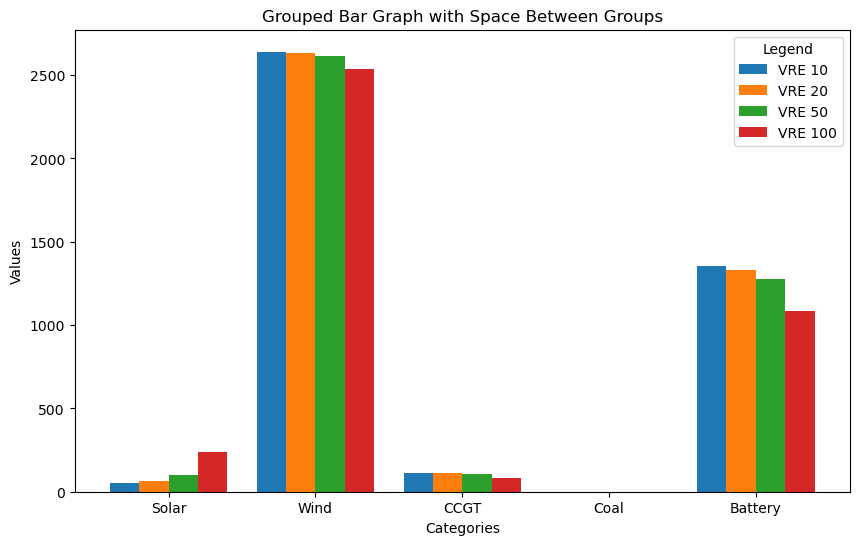

In [22]:
name_demand_flex_input = ["demand_flex_vre10", "demand_flex_vre20", "demand_flex_vre50", "demand_flex_vre100"]
carbon_price = "CO2_100_"
main_folder = '/Users/adrienguenard/Desktop/MIT/2.AeroAstro/IDS.522/Project/1.WIP/DSF/DSF_optimization/Results'


matrix_Power = np.zeros((5,4))

for i, flex_scenario in enumerate(name_demand_flex_input):


    df = pd.read_csv(f'{main_folder}/{carbon_price}Power{flex_scenario}.csv')
    df.reset_index(drop=True, inplace=True)

    matrix_Power[:,i] = df["Installed Power"]



categories = ['Solar', 'Wind', 'CCGT', 'Coal', 'Battery']
legend_labels = ['VRE 10', 'VRE 20', 'VRE 50', 'VRE 100']

#Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2  # Adjust the width of each bar
#space_between_groups = 0.4  # Adjust the space between groups
bar_positions = np.arange(len(categories))

for i, label in enumerate(legend_labels):
    bars = ax.bar(bar_positions + i * (bar_width ), matrix_Power[:, i], bar_width, label=label)

# Customize the plot
ax.set_xticks(bar_positions + (len(legend_labels) - 1) * (bar_width ) / 2)
ax.set_xticklabels(categories)
ax.legend(title='Scenario')
ax.set_xlabel('Technologies')
ax.set_ylabel('Installed Power')
ax.set_title('Installed power for different level of DSF')

plt.show()

plt.show()